<a href="https://colab.research.google.com/github/cheungngo/computational_physics/blob/main/03_03_01_Elliptical_integrals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pendulums and Ellpitical Integrals

Consider a simplified pendulum:

$ \frac{d^2\theta}{dt^2} = -\omega_0^2 \sin(\theta) $

# Period $ T_0 $ using small angle approximation

The period $ T_0 $ for a simple pendulum (under the small angle approximation) is derived from the linearized equation of motion.

Starting with the equation of motion for a pendulum:

$
\frac{d^2\theta}{dt^2} + \frac{g}{l} \sin(\theta) = 0
$

This is a nonlinear differential equation because of the $ \sin(\theta) $ term. For small angles, we can use the approximation:

$
\sin(\theta) \approx \theta \quad (\text{for} \, \theta \, \text{in radians and close to 0})
$

Substituting this approximation into the equation of motion, we get a linear differential equation:

$
\frac{d^2\theta}{dt^2} + \frac{g}{l} \theta = 0
$

This is a simple harmonic motion equation. The solution to this equation is of the form:

$
\theta(t) = A \cos(\omega t + \phi)
$

Where:
- $ A $ is the amplitude.
- $ \omega $ is the angular frequency.
- $ \phi $ is the phase constant.

The angular frequency $ \omega $ is given by:

$
\omega = \sqrt{\frac{g}{l}}
$

The period of oscillation $ T_0 $ for simple harmonic motion is related to the angular frequency by:

$
T_0 = \frac{2\pi}{\omega}
$

Substituting in the value for $ \omega $, we get:

$
T_0 = 2\pi \sqrt{\frac{l}{g}}
$

This is the expression for the period of a simple pendulum under the small angle approximation.

# Beyond the small-angle approximation

## Conversation of energy in the simplified pendulum

Alright, let's derive the expression for the velocity of the pendulum as a function of its position using the principle of conservation of energy.

For a pendulum of length $ l $ and mass $ m $ (which we'll need for the energy equations), the potential energy $ U $ when displaced by an angle $ \theta $ from the vertical is given by the height it has been raised:

$
U(\theta) = m \cdot g \cdot l (1 - \cos(\theta))
$

The kinetic energy $ K $ when the pendulum is moving with an angular velocity $ \frac{d\theta}{dt} $ is:

$
K = \frac{1}{2} m \cdot l^2 \left(\frac{d\theta}{dt}\right)^2
$

By conservation of energy, the total energy at any position $ \theta $ is the same as the total energy when the pendulum is at its maximum displacement $ \theta_0 $ and at rest (i.e., all potential energy, no kinetic energy). Thus:

$
U(\theta_0) = U(\theta) + K
$

Substituting in our expressions for $ U $ and $ K $, we get:

$
m \cdot g \cdot l (1 - \cos(\theta_0)) = m \cdot g \cdot l (1 - \cos(\theta)) + \frac{1}{2} m \cdot l^2 \left(\frac{d\theta}{dt}\right)^2
$

Now, we'll simplify this equation to solve for $ \frac{d\theta}{dt} $ in terms of $ \theta $ and $ \theta_0 $.

In [33]:
from sympy import symbols, Eq, solve, cos, sin

# Define symbols
theta, theta_0, dtheta_dt, g, l, m = symbols('theta theta_0 dtheta_dt g l m', real=True)

# Expressions for potential energy at θ and θ0
U_theta = m * g * l * (1 - cos(theta))
U_theta_0 = m * g * l * (1 - cos(theta_0))

# Expression for kinetic energy
K = 0.5 * m * l**2 * dtheta_dt**2

# Conservation of energy equation
energy_equation = Eq(U_theta_0, U_theta + K)

# Solve for dtheta_dt in terms of theta and theta_0
velocity_expression = solve(energy_equation, dtheta_dt, rational=True)[1]  # Taking the positive root, since negative root gives negative velocity
velocity_expression


sqrt(2)*sqrt(g*(cos(theta) - cos(theta_0))/l)

Consider:

$
\frac{d \theta}{dt} $ = the above expression

take the integral for $dt$ from 0 to $\theta_0$ would be:

$
I = \frac{1}{\sqrt{2}} \int_0^{\theta_0} \frac{d\theta}{\sqrt{\cos(\theta) - \cos(\theta_0)}}
$

after some steps (https://mathworld.wolfram.com/EllipticIntegraloftheFirstKind.html), we can prove that

$
I = K (\sin(\frac{\theta_0}{2}))
$

Therefore,

$
T = 4 \sqrt{\frac{L}{g}} K (\sin(\frac{\theta_0}{2}))
$

# Estimation of the true period $T$ using different approaches

## Solve theta and omega numerically, with period T estimated by graph

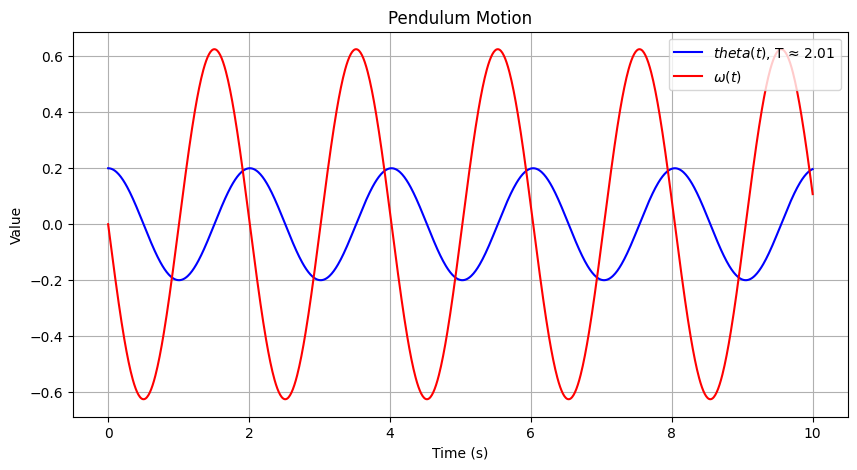

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

# Constants
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1.0  # length of the pendulum (m)
omega_0 = np.sqrt(g/l)  # natural frequency

# System of ODEs
def pendulum(Y, t, omega_0):
    theta, omega = Y
    dtheta_dt = omega
    domega_dt = -omega_0**2 * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Initial conditions
theta0 = 0.2
omega0 = 0.0

# Time points to solve for
t = np.linspace(0, 10, 1000)

# Solve the system of equations
solution = odeint(pendulum, [theta0, omega0], t, args=(omega_0,))

# Extract the solution
theta = solution[:, 0]
omega = solution[:, 1]

peaks, _ = find_peaks(theta)  # Find peaks to estimate the period
period_estimate = np.mean(np.diff(t[peaks]))  # Average time between peaks

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, theta, color='blue', label=f'$theta(t)$, T ≈ {period_estimate:.2f}')
plt.plot(t, omega, label=r'$\omega(t)$', color='red')
plt.title('Pendulum Motion')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Calculate T the period using the elliptical integral

Consider:

$
T = 4 \sqrt{\frac{L}{g}}K(m^2)
$

while $m = \sin(\frac{\theta_0}{2})$ and K() being the elliptical integral

In [22]:
from scipy.special import ellipk
import numpy as np

# Restating the above constants
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1.0   # length of the pendulum (m)
theta0 = 0.2

# Calculate m
m = np.sin(theta0/2)

# Calculate the elliptical integral K(m^2)
elliptic_integral_value = ellipk(m**2)

# Estimate T
T = 4 * np.sqrt(l/g) * elliptic_integral_value

T


2.0110933707180285

## Calculate T the period using the quad() function

In [21]:
# Restating the above constants
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1.0   # length of the pendulum (m)
theta0 = 0.2

# Calculate m
m = np.sin(theta0/2)

def integrand(theta, m):
    return 1 / sqrt(1 - m**2 * sin(theta)**2)

# Function to compute T for a given theta_m
def compute_T(theta_0):
    m = sin(theta_0/2)
    integral_value, _ = quad(integrand, 0, np.pi/2, args=(m))
    T = 4 * np.sqrt(l/g) * integral_value
    return T

T = compute_T(0.2)

T

2.0110933707180285

## Calculate T the period using power approximation

In [25]:
import numpy as np

def elliptic_integral_approximation(k, num_terms=5):
    """
    Approximate the complete elliptic integral of the first kind K(k)
    using a power series expansion.

    Parameters:
    - k: modulus of the elliptic integral
    - num_terms: number of terms in the series expansion to consider

    Returns:
    - Approximate value of K(k)
    """
    sum_terms = 1
    for i in range(1, num_terms+1):
        prod_numerator = np.prod(np.arange(1, 2*i, 2))
        prod_denominator = np.prod(np.arange(2, 2*i+1, 2))
        sum_terms += (prod_numerator / prod_denominator)**2 * k**(2*i)

    return (np.pi / 2) * sum_terms


1.6857254415509837

In [26]:
# Restating the above constants
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1.0   # length of the pendulum (m)
theta0 = 0.2

# Calculate m
m = np.sin(theta0/2)

# Calculate the elliptical integral K(m^2)
elliptic_integral_value = elliptic_integral_approximation(m**2)

# Estimate T
T = 4 * np.sqrt(l/g) * elliptic_integral_value

T

2.0061165018182963

## Calculate T the period using polynomial approximation

In [27]:
def elliptic_integral_polynomial_approximation(m):
    """
    Approximate the complete elliptic integral of the first kind K(m)
    using a polynomial expansion.

    Parameters:
    - m: modulus squared of the elliptic integral

    Returns:
    - Approximate value of K(m)
    """
    # Coefficients as given
    a0, a1, a2 = 1.3862944, 0.1119723, 0.0725296
    b0, b1, b2 = 0.5, 0.1213478, 0.0288729

    # Compute m1
    m1 = 1 - m

    # Polynomial approximation
    K_approx = (a0 + a1*m1 + a2*m1**2) - (b0 + b1*m1 + b2*m1**2) * np.log(m1)

    return K_approx

In [28]:
# Restating the above constants
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1.0   # length of the pendulum (m)
theta0 = 0.2

# Calculate m
m = np.sin(theta0/2)

# Calculate the elliptical integral K(m^2)
elliptic_integral_value = elliptic_integral_polynomial_approximation(m**2)

# Estimate T
T = 4 * np.sqrt(l/g) * elliptic_integral_value

T

2.0110992806139207

## Break-down of the small angle approximation T0

Deviation of the ratio T/T0 indicates the break-down of the small-angle approx.

It is expected that the ratio increases as the $ \theta_0 $ increases

In [32]:
import numpy as np
from scipy.integrate import quad

# Constants
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1.0   # length of the pendulum (m)

# Calculate T0
T0 = 2 * np.pi * np.sqrt(l/g)

# Integrand for quad method
def integrand(theta, m):
    return 1 / np.sqrt(1 - m**2 * np.sin(theta)**2)

# Compute T/T0 ratios for increasing theta_0 from 0 to pi/2 using all methods
theta0_values = np.linspace(0, np.pi/2, 100)
ratios_ellipk = []
ratios_quad = []
ratios_power_approx = []
ratios_poly_approx = []

for theta0 in theta0_values:
    m = np.sin(theta0/2)
    k = m**2  # modulus squared

    # Using scipy.special.ellipk
    T_ellipk = 4 * np.sqrt(l/g) * ellipk(k)
    ratios_ellipk.append(T_ellipk/T0)

    # Using quad
    integral_value, _ = quad(integrand, 0, np.pi/2, args=(m))
    T_quad = 4 * np.sqrt(l/g) * integral_value
    ratios_quad.append(T_quad/T0)

    # Using power approximation
    T_power_approx = 4 * np.sqrt(l/g) * elliptic_integral_approximation(m)
    ratios_power_approx.append(T_power_approx/T0)

    # Using polynomial approximation
    T_poly_approx = 4 * np.sqrt(l/g) * elliptic_integral_polynomial_approximation(k)
    ratios_poly_approx.append(T_poly_approx/T0)


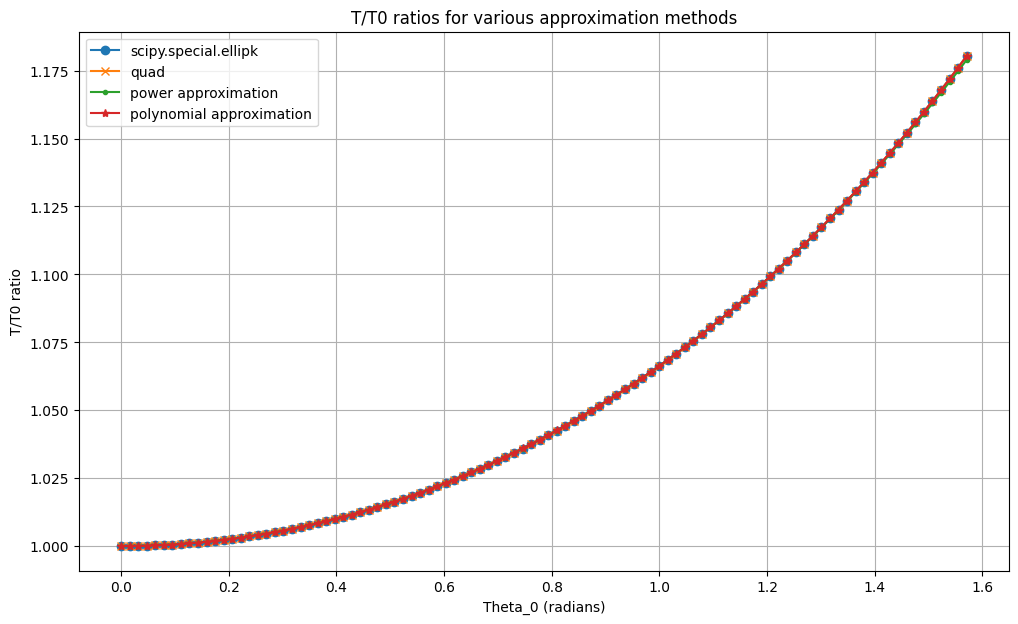

In [31]:
import matplotlib.pyplot as plt

# Plotting the T/T0 ratios for each method against theta0_values
plt.figure(figsize=(12, 7))
plt.plot(theta0_values, ratios_ellipk, label='scipy.special.ellipk', linestyle='-', marker='o')
plt.plot(theta0_values, ratios_quad, label='quad', linestyle='-', marker='x')
plt.plot(theta0_values, ratios_power_approx, label='power approximation', linestyle='-', marker='.')
plt.plot(theta0_values, ratios_poly_approx, label='polynomial approximation', linestyle='-', marker='*')
plt.xlabel('Theta_0 (radians)')
plt.ylabel('T/T0 ratio')
plt.title('T/T0 ratios for various approximation methods')
plt.legend()
plt.grid(True)
plt.show()
